# Evaluation Project - 7
Loan Application Status Prediction
Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
(df.loc[:,:]==" ").sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
(df.loc[:,:]==0).sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [11]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [13]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [14]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [15]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [16]:
import statistics as stats
df["Gender"]=df["Gender"].fillna(stats.mode(df["Gender"]))
df["Married"]=df["Married"].fillna(stats.mode(df["Married"]))
df["Dependents"]=df['Dependents'].fillna(stats.mode(df["Dependents"]))
df["Self_Employed"]=df["Self_Employed"].fillna(stats.mode(df["Self_Employed"]))
df["LoanAmount"]=df["LoanAmount"].fillna(np.mean(df["LoanAmount"]))
df["Credit_History"]=df["Credit_History"].fillna(stats.mode(df["Credit_History"]))
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(stats.mode(df["Loan_Amount_Term"]))
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All nan values are filled.

# EDA

Text(0.5, 1.0, 'Gender')

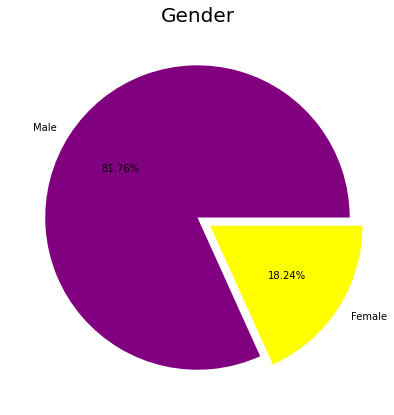

In [17]:
count=df["Gender"].value_counts()
explode = [0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["purple","yellow"],autopct="%0.2f%%",explode=explode)
plt.title("Gender",size=20)


    
Most male have applied for a loan than female.

Text(0.5, 1.0, 'Education')

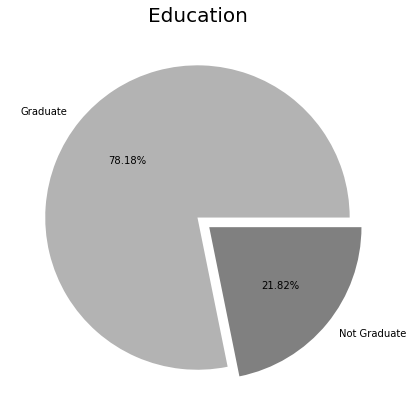

In [18]:
count=df["Education"].value_counts()
explode = [0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["0.7","0.5"],autopct="%0.2f%%",explode=explode)
plt.title("Education",size=20)


    
Most individuals applying for a loan are graduates.

Text(0.5, 1.0, 'Married')

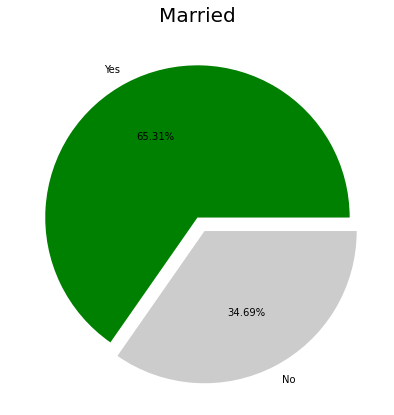

In [19]:
count=df["Married"].value_counts()
explode = [0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["green","0.8"],autopct="%0.2f%%",explode=explode)
plt.title("Married",size=20)


    
Most applicants are married.

Text(0.5, 1.0, 'Loan_Status')

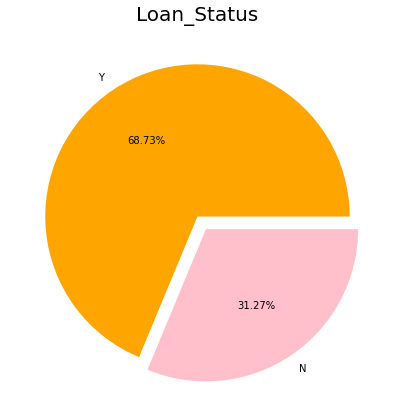

In [20]:
count=df["Loan_Status"].value_counts()
explode = [0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["orange","pink"],autopct="%0.2f%%",explode=explode)
plt.title("Loan_Status",size=20)


    
Most applicants had their loans approved.

Text(0.5, 1.0, 'Property_Area')

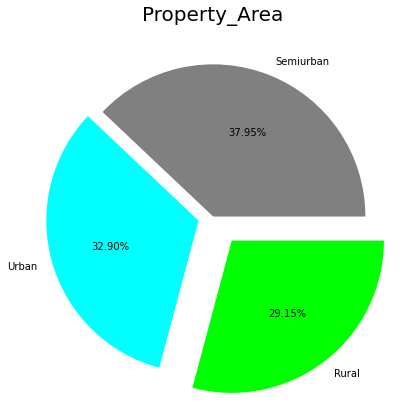

In [21]:
count=df["Property_Area"].value_counts()
explode = [0, 0.1,0.2]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["grey","cyan","lime"],autopct="%0.2f%%",explode=explode)
plt.title("Property_Area",size=20)


    
1. There higher number of semiurban applicants than urban or rural. 


2. Semiurban and rural account to close to 67% of the total applicants.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

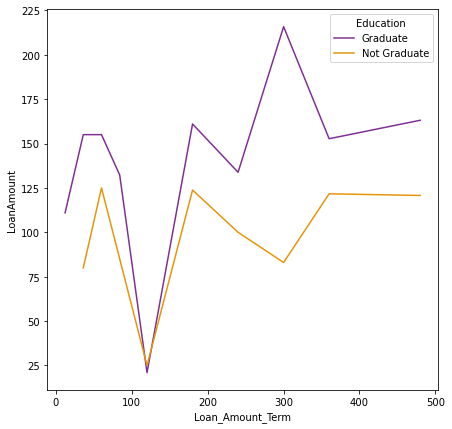

In [22]:
plt.figure(figsize=(7,7))

sns.lineplot(y="LoanAmount",x="Loan_Amount_Term",hue="Education",data=df,ci=None,palette ="CMRmap")


    Appplicants with graduation apply for a higher loan amount for the same tenure. 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

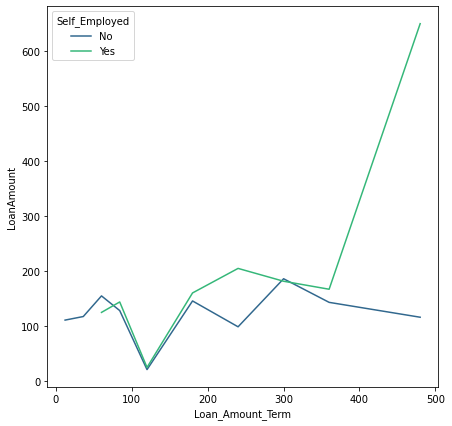

In [23]:
plt.figure(figsize=(7,7))

sns.lineplot(y="LoanAmount",x="Loan_Amount_Term",hue="Self_Employed",data=df,ci=None,palette ="viridis")


    
Self employed applicants apply for a  higher  loan amounts for the same tenure.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

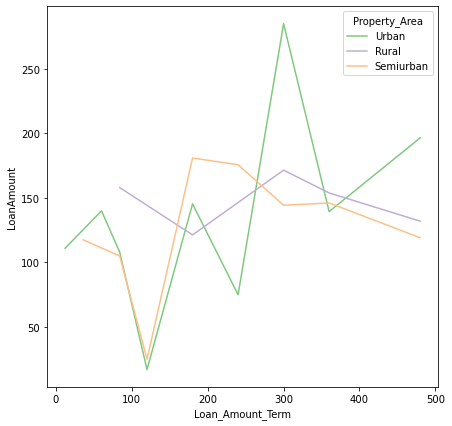

In [24]:
plt.figure(figsize=(7,7))

sns.lineplot(y="LoanAmount",x="Loan_Amount_Term",hue="Property_Area",data=df,ci=None,palette ="Accent")


    
Applicants from urban apply for higher loan amount for the tenure when compare to semiurban. Likewise, semiurbans apply for higher loan amount than rural.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

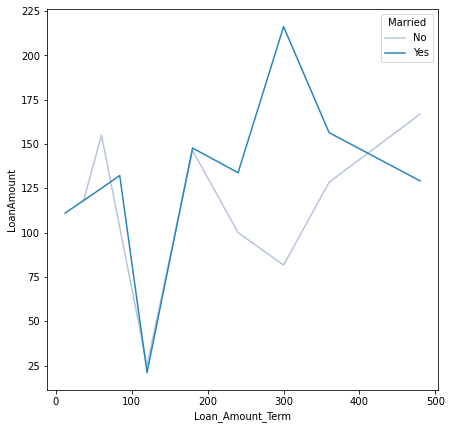

In [25]:
plt.figure(figsize=(7,7))

sns.lineplot(y="LoanAmount",x="Loan_Amount_Term",hue="Married",data=df,ci=None,palette ="PuBu")


    
Most married applicants apply for higher loan amount than the ones not married.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

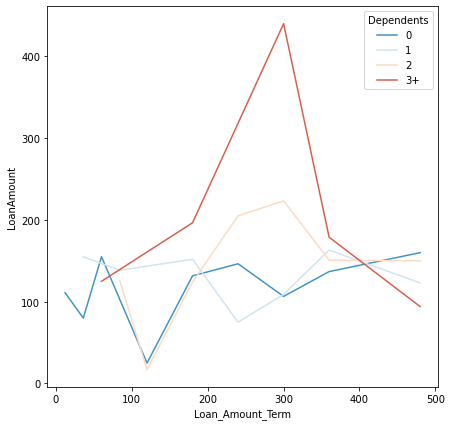

In [26]:
plt.figure(figsize=(7,7))

sns.lineplot(y="LoanAmount",x="Loan_Amount_Term",hue="Dependents",data=df,ci=None,palette ="RdBu_r")


    
Most individuals with 3+ dependents apply for higher loan amount than 0,1 and 2 dependents.

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

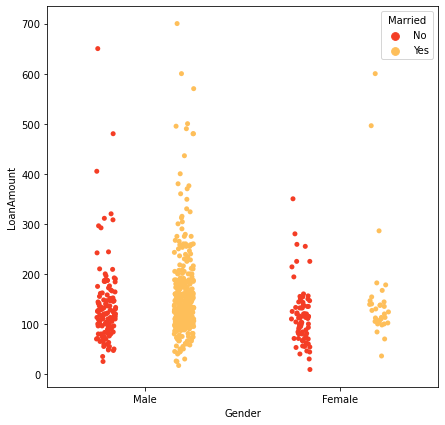

In [27]:
plt.figure(figsize=(7,7))

sns.stripplot(y="LoanAmount",data=df,x="Gender",palette="YlOrRd_r",hue="Married",dodge=True)



    
1. Most male that are married apply for higher loan amount than the one that aren't.


2. Fewer number of women that are married apply for a loan amount higher than the one that aren't.

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

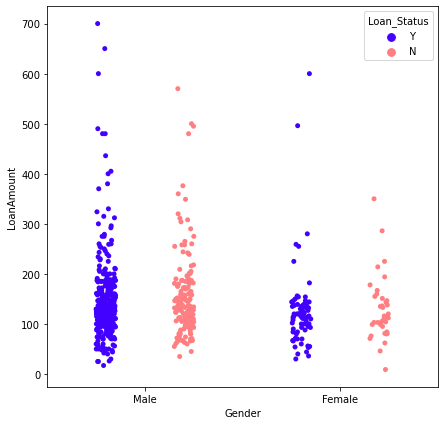

In [28]:
plt.figure(figsize=(7,7))

sns.stripplot(y="LoanAmount",data=df,x="Gender",palette="gnuplot2",hue="Loan_Status",dodge=True)

Observation:
    
1. Fewer number of women when compared to men faced rejection. This could also be because there were fewer female applicants. 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

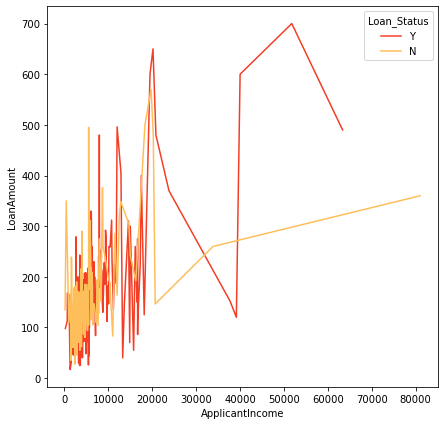

In [29]:
plt.figure(figsize=(7,7))

sns.lineplot(x="ApplicantIncome",y="LoanAmount",hue="Loan_Status",data=df,ci=None,palette ="YlOrRd_r")


    
Applicants with lower income have chances to getting higher loan amounts approved.

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

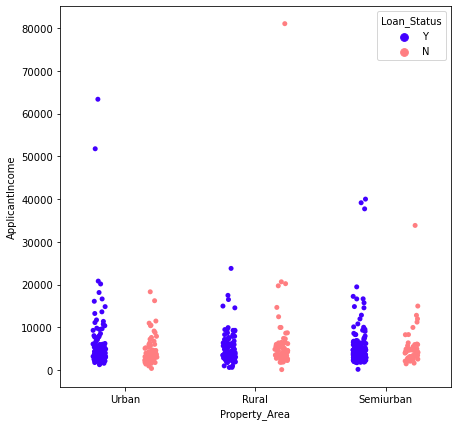

In [30]:
plt.figure(figsize=(7,7))

sns.stripplot(y="ApplicantIncome",data=df,x="Property_Area",palette="gnuplot2",hue="Loan_Status",dodge=True)


    
1. Urban dwellers with higer income get their loans approved. 


2. A rural dweller even with high income faced  rejection.

Text(0.5, 1.0, 'Approved loans')

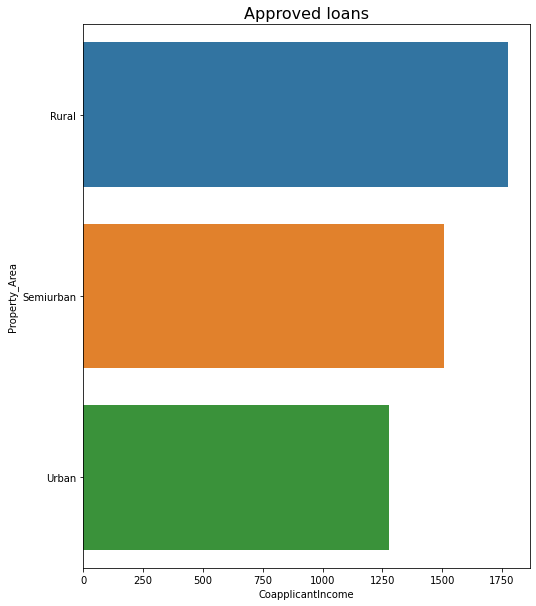

In [31]:
df_org = df.loc[df["Loan_Status"] == "Y"]
df_r = df_org.groupby(["Property_Area"])[["CoapplicantIncome"]].mean().sort_values(by = "CoapplicantIncome", ascending = False)
plt.figure(figsize = (8, 10))
sns.barplot(data = df_r, x = "CoapplicantIncome", y = df_r.index)
plt.title("Approved loans", size = 16)


    
1. Highest number of rural applicants got their loans approved with higher coapplicant's income. 


2. least number of urban applicants got their loan approved with lower coapplicant's income. 

Text(0.5, 1.0, 'Rejected loans')

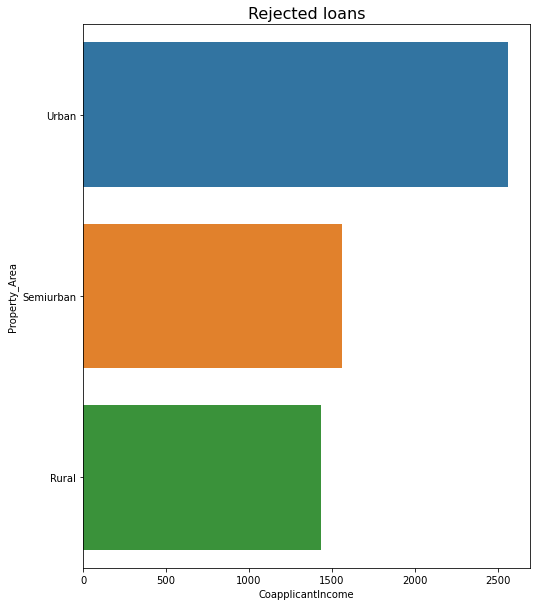

In [32]:
df_org = df.loc[df["Loan_Status"] == "N"]
df_r = df_org.groupby(["Property_Area"])[["CoapplicantIncome"]].mean().sort_values(by = "CoapplicantIncome", ascending = False)
plt.figure(figsize = (8, 10))
sns.barplot(data = df_r, x = "CoapplicantIncome", y = df_r.index)
plt.title("Rejected loans", size = 16)


    
1. Higher number of urban applicants faced rejection with higher coapplicant's income.


2. Least number of rural applicants faced rejection with lower coapplicant's income.

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

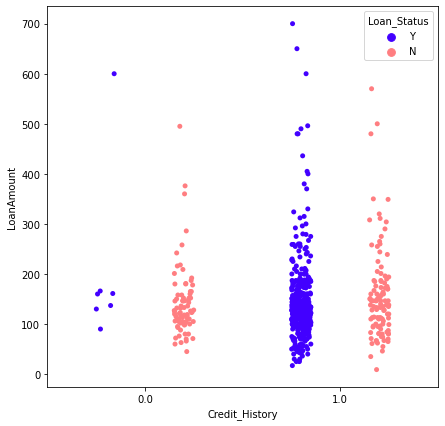

In [33]:
plt.figure(figsize=(7,7))

sns.stripplot(y="LoanAmount",data=df,x="Credit_History",palette="gnuplot2",hue="Loan_Status",dodge=True)


    
1. barely any applicants with 0 credit history got their loan approved.


2. Most applicants with credit history got their loans approved even with higher loan amounts.

# Label encoding 

In [34]:
import sklearn 
from sklearn.preprocessing import LabelEncoder 
lencode=LabelEncoder()

In [35]:
df["Gender"]=lencode.fit_transform(df["Gender"])
df["Married"]=lencode.fit_transform(df["Married"])
df["Dependents"]=lencode.fit_transform(df["Dependents"])
df["Education"]=lencode.fit_transform(df["Education"])
df["Self_Employed"]=lencode.fit_transform(df["Self_Employed"])
df["Property_Area"]=lencode.fit_transform(df["Property_Area"])
df["Loan_Status"]=lencode.fit_transform(df["Loan_Status"])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [36]:
df=df.drop(["Loan_ID"],axis=1)  #all unique values

In [37]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [38]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

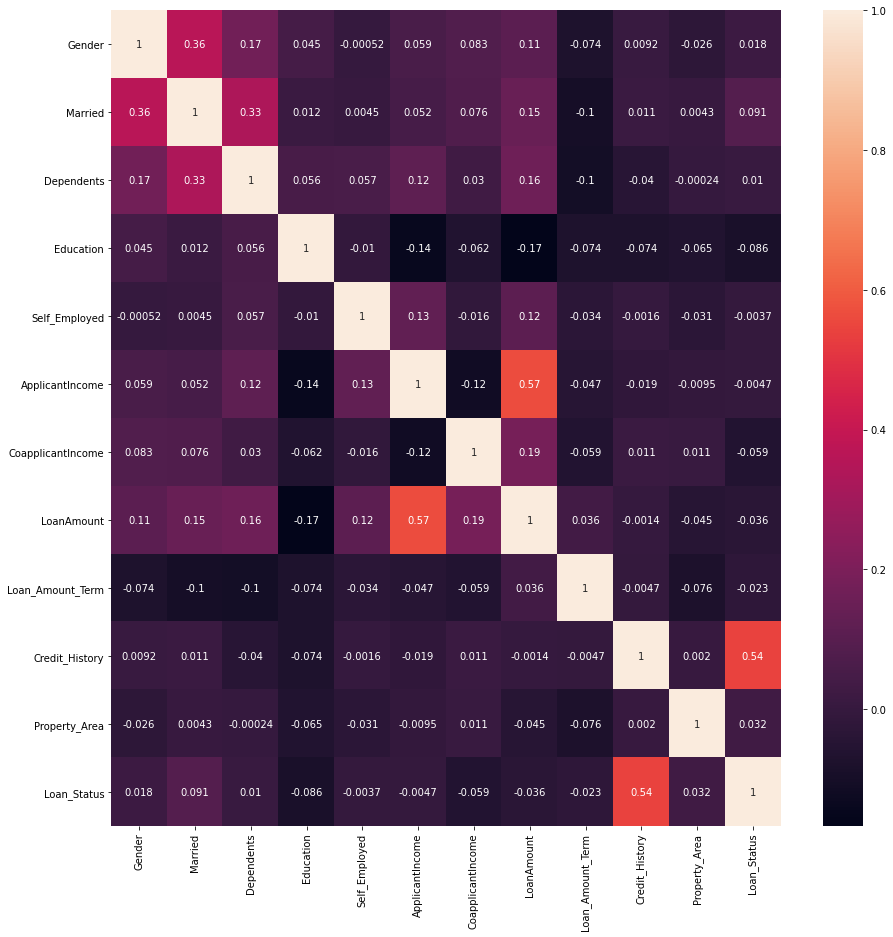

In [39]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)


    
1. Applicants income and self employed have correlation with loan status close to zero.


2. Credit history has the highest correlation with loan status.

In [40]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000



    
Applicant's income, coapplicant's income and loan amount are not normally distributed. 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB



    No null values present.

# Checking for outliers and skewness

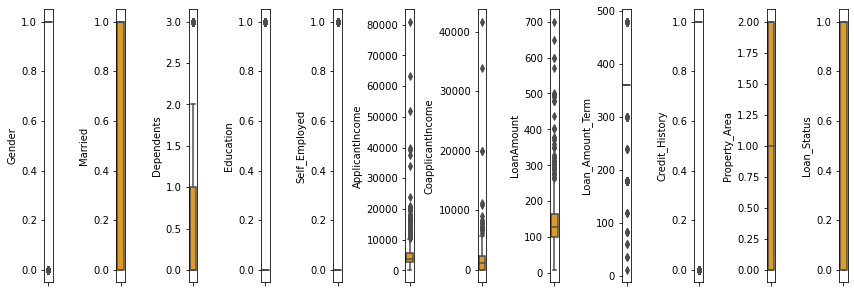

In [42]:
collist=df.columns.values
ncol=20 #no.of columns and rows to display the graphs i.e max col and max row
nrows=15
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color="orange",orient="v")
    plt.tight_layout()


    
1. applicant income, coapplicant income and loan amount have outliers.

In [43]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64


    
applicant income, coapplicant income and loan amount have skewness.

# Data Cleaning

In [44]:
df=df.drop(["ApplicantIncome","Self_Employed"],axis=1)  #correlation is almost equal to zero with the target.

In [45]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def c_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [46]:
c_vif(x)

,variables,VIF
0,Gender,5.988964
1,Married,3.647723
2,Dependents,1.784934
3,Education,1.300372
4,CoapplicantIncome,1.364966
5,LoanAmount,4.355778
6,Loan_Amount_Term,10.271447
7,Credit_History,6.053629
8,Property_Area,2.569593


In [47]:
#df["diff"]=(df["LoanAmount"]-df["Loan_Amount_Term"])**2
#df

In [48]:
df=df.drop(["Loan_Amount_Term"],axis=1)

In [49]:
x=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]
c_vif(x)

,variables,VIF
0,Gender,5.422472
1,Married,3.641869
2,Dependents,1.782952
3,Education,1.267209
4,CoapplicantIncome,1.364293
5,LoanAmount,3.788859
6,Credit_History,4.426794
7,Property_Area,2.397412


In [50]:
import scipy 
from scipy.stats import zscore 
z=np.abs(zscore(df))  #removes outliers
z.shape

(614, 9)

In [51]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 9)
(594, 9)


In [52]:
#data loss 
(614-594)/614*100

3.257328990228013

data loss is less than 10% we can proceed.

In [53]:
x=df_new.drop(["Loan_Status"],axis=1)
y=df_new["Loan_Status"]

In [54]:
print(x.shape)
print(y.shape)

(594, 8)
(594,)


In [55]:
from sklearn.preprocessing import power_transform 
x=power_transform(x,method="yeo-johnson") #removing skewness 

# Preprocessing 

In [56]:
import sklearn 
from sklearn.preprocessing import MinMaxScaler 

In [57]:
ms=MinMaxScaler()
x=ms.fit_transform(x)
x

array([[1.        , 0.        , 0.        , ..., 0.59821418, 1.        ,
        1.        ],
       [1.        , 1.        , 0.72187366, ..., 0.5523369 , 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.35745931, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.72187366, ..., 0.81089402, 1.        ,
        1.        ],
       [1.        , 1.        , 0.91534128, ..., 0.68796063, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.56518067, 0.        ,
        0.53404371]])

# SMOTE

In [58]:
y.value_counts()

1    410
0    184
Name: Loan_Status, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE 
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [60]:
trainy.value_counts()

0    410
1    410
Name: Loan_Status, dtype: int64

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [62]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    
    pred_test_lr=lr.predict(x_test)
    
    print("At random state=",i,'testing accuracy =',accuracy_score(y_test,pred_test_lr))
    print("\n")

At random state= 0 testing accuracy = 0.7134146341463414


At random state= 1 testing accuracy = 0.6951219512195121


At random state= 2 testing accuracy = 0.6890243902439024


At random state= 3 testing accuracy = 0.725609756097561


At random state= 4 testing accuracy = 0.6707317073170732


At random state= 5 testing accuracy = 0.6341463414634146


At random state= 6 testing accuracy = 0.6707317073170732


At random state= 7 testing accuracy = 0.6463414634146342


At random state= 8 testing accuracy = 0.6890243902439024


At random state= 9 testing accuracy = 0.6951219512195121


At random state= 10 testing accuracy = 0.6585365853658537


At random state= 11 testing accuracy = 0.7134146341463414


At random state= 12 testing accuracy = 0.6524390243902439


At random state= 13 testing accuracy = 0.7195121951219512


At random state= 14 testing accuracy = 0.7134146341463414


At random state= 15 testing accuracy = 0.676829268292683


At random state= 16 testing accuracy = 0.71341463414

In [63]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2,random_state=50)
lr.fit(x_train,y_train)
    
pred_test_lr=lr.predict(x_test)
    
print('testing accuracy =',accuracy_score(y_test,pred_test_lr))

testing accuracy = 0.7560975609756098


In [64]:
from sklearn.model_selection import cross_val_score 
for i in range(2,11):
    rf_cv=cross_val_score(lr,trainx,trainy,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 71.21951219512195 at cv = 2
Score = 68.90100977692218 at cv = 3
Score = 70.1219512195122 at cv = 4
Score = 69.7560975609756 at cv = 5
Score = 69.62662802347216 at cv = 6
Score = 69.87852072597836 at cv = 7
Score = 70.10874738244812 at cv = 8
Score = 69.75500345065562 at cv = 9
Score = 69.6341463414634 at cv = 10


In [65]:
rf_cv=cross_val_score(lr,trainx,trainy,cv=8)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(y_test,pred_test_lr))

CV Score = 70.10874738244812
Accuracy_score = 0.7560975609756098


In [66]:
 x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2)

# DecisionTree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [68]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

pred_test_dt=dt.predict(x_test)
acc_test=accuracy_score(pred_test_dt,y_test)

print("acc_test =",acc_test)

acc_test = 0.7134146341463414


In [69]:
for i in range(2,11):
    rf_cv=cross_val_score(dt,trainx,trainy,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 72.3170731707317 at cv = 2
Score = 71.83141270732513 at cv = 3
Score = 73.53658536585365 at cv = 4
Score = 74.02439024390245 at cv = 5
Score = 74.88192357234865 at cv = 6
Score = 75.62653918586122 at cv = 7
Score = 75.88282885969922 at cv = 8
Score = 75.49503636460159 at cv = 9
Score = 76.46341463414635 at cv = 10


In [70]:
rf_cv=cross_val_score(dt,trainx,trainy,cv=9)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_test_dt,y_test)*100)

CV Score = 75.25216329564155
Accuracy_score = 71.34146341463415


# RandomForest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

pred_test_rf=rf.predict(x_test)
acc_test=accuracy_score(pred_test_rf,y_test)

print("acc_test =",acc_test)

acc_test = 0.7987804878048781


In [72]:
for i in range(2,11):
    rf_cv=cross_val_score(rf,trainx,trainy,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 76.82926829268293 at cv = 2
Score = 77.68553425487733 at cv = 3
Score = 78.53658536585367 at cv = 4
Score = 78.90243902439025 at cv = 5
Score = 78.90815085158151 at cv = 6
Score = 80.25289211729888 at cv = 7
Score = 79.28564629735388 at cv = 8
Score = 79.76323193714498 at cv = 9
Score = 79.26829268292683 at cv = 10


In [73]:
rf_cv=cross_val_score(rf,trainx,trainy,cv=10)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_test_rf,y_test)*100)

CV Score = 79.51219512195122
Accuracy_score = 79.8780487804878


# SVC

In [74]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
accuracy_score(y_test,y_pred_svc)

0.7134146341463414

In [75]:
for i in range(2,11):
    rf_cv=cross_val_score(svc,trainx,trainy,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 70.97560975609755 at cv = 2
Score = 71.22046647594092 at cv = 3
Score = 72.5609756097561 at cv = 4
Score = 72.07317073170732 at cv = 5
Score = 71.57846715328468 at cv = 6
Score = 73.05001966018915 at cv = 7
Score = 72.8083952027413 at cv = 8
Score = 72.44120613685831 at cv = 9
Score = 73.65853658536585 at cv = 10


In [76]:
rf_cv=cross_val_score(svc,trainx,trainy,cv=5)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(y_test,y_pred_svc)*100)

CV Score = 72.07317073170732
Accuracy_score = 71.34146341463415


# Hyper parameter tuning

In [77]:
from sklearn.model_selection import GridSearchCV
param = {"criterion":["gini","entropy"],"max_features":["auto","sqrt","log2"],"bootstrap":[True,False],"n_estimators":[50,100,150,200]}
clf = GridSearchCV(RandomForestClassifier(),param_grid=param)

In [78]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [79]:
print(clf.best_params_)
print(clf.best_score_)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 150}
0.8033772842933148


In [85]:
rf=RandomForestClassifier(bootstrap=True,criterion="gini",max_features="sqrt",n_estimators=150)
rf.fit(x_train,y_train)

pred_test_rf=rf.predict(x_test)
acc_test=accuracy_score(pred_test_rf,y_test)

print("acc_test =",acc_test*100)

acc_test = 79.26829268292683


In [86]:
rf_cv=cross_val_score(rf,trainx,trainy,cv=4)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_test_rf,y_test)*100)

CV Score = 78.17073170731707
Accuracy_score = 79.26829268292683


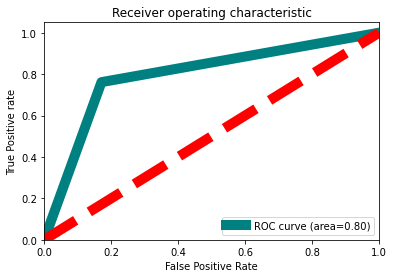

In [87]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(pred_test_rf,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="teal",lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color="red",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The best fit model is this having accuracy score=79.2 , CV score=78.1 and ROC=80

# Model saving

In [88]:
import pickle 
filename= "Loan.pkl"
pickle.dump(rf, open(filename,"wb"))

# Conclusion 

In [89]:
a=np.array(y_test)
predicted = np.array(rf.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
159,0,1
160,0,0
161,0,0
162,1,0
